In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
od.download("https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: assaabriiii
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


100%|██████████| 1.55k/1.55k [00:00<00:00, 4.31MB/s]

In [5]:
import pandas as pd
df = pd.read_csv("/content/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [6]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.cluster import KMeans

In [12]:
inertia = []
range_values = range(1, 11)

for i in range_values:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

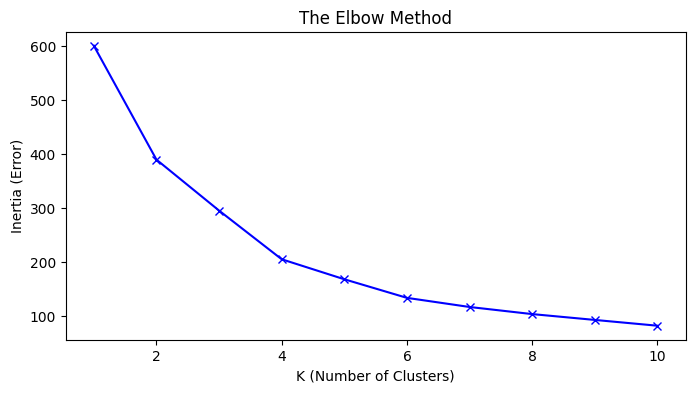

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(range_values, inertia, 'bx-')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia (Error)')
plt.title('The Elbow Method')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score

In [16]:
kmeans = KMeans(
    n_clusters=5,
    random_state=42,
    n_init=10,
)
df['Cluster'] = kmeans.fit_predict(X_scaled)

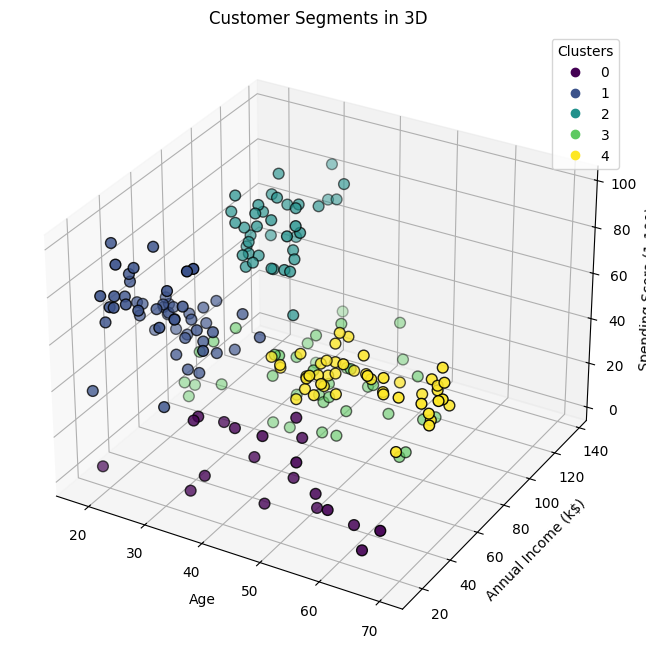

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        46.250000           26.750000               18.350000
1        25.185185           41.092593               62.240741
2        32.875000           86.100000               81.525000
3        39.871795           86.102564               19.358974
4        55.638298           54.382979               48.851064


In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# x=Age, y=Income, z=Score
sc = ax.scatter(
    df['Age'],
    df['Annual Income (k$)'],
    df['Spending Score (1-100)'],
    c=df['Cluster'],
    cmap='viridis',
    s=60,
    edgecolors='black'
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('Customer Segments in 3D')
plt.legend(*sc.legend_elements(), title="Clusters")
plt.show()

# 6. Interpretation (Who are these people?)
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())